# Hit-Miss_EunChan Lee

## 원주율 계산

In [7]:
############################################################
#### 2024.09.30. ###########################################
#### EunChan Lee ###########################################
#### eunchan_supernova@gm.gist.ac.kr #######################
############################################################



import numpy as np

def monte_carlo_pi(n):
    # [0,1] 구간에서 n개의 x, y 좌표를 랜덤 생성
    x = np.random.rand(n)
    y = np.random.rand(n)

    # 원점으로부터의 거리 계산
    distances = np.sqrt(x**2 + y**2)

    # 거리 <= 1인 점의 개수를 세기
    count = np.sum(distances <= 1)

    # P = count / n, 추정된 pi 값은 P * 4
    P = count / n
    pi_estimate = P * 4

    # 결과 출력
    print(f"원점으로부터의 거리가 1 미만인 점의 개수: {count}")
    print(f"총 점의 개수: {n}")
    print(f"원주율의 추정값: {pi_estimate}")

# 사용자로부터 n 입력받기
n = int(input("생성할 난수 점의 개수 n을 입력하세요: "))

# 시뮬레이션 실행
monte_carlo_pi(n)

생성할 난수 점의 개수 n을 입력하세요: 1000000000
원점으로부터의 거리가 1 미만인 점의 개수: 785401009
총 점의 개수: 1000000000
원주율의 추정값: 3.141604036


## n 수에 따른 정확도 및 오차

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.96it/s]


n=1000, 추정된 원주율: 3.136, 오차: 0.005592653589792995
n=10000, 추정된 원주율: 3.1344, 오차: 0.007192653589793263
n=100000, 추정된 원주율: 3.14828, 오차: 0.006687346410207073
n=1000000, 추정된 원주율: 3.142036, 오차: 0.0004433464102069351
n=10000000, 추정된 원주율: 3.1420892, 오차: 0.0004965464102069106
n=100000000, 추정된 원주율: 3.14143168, 오차: 0.0001609735897929454


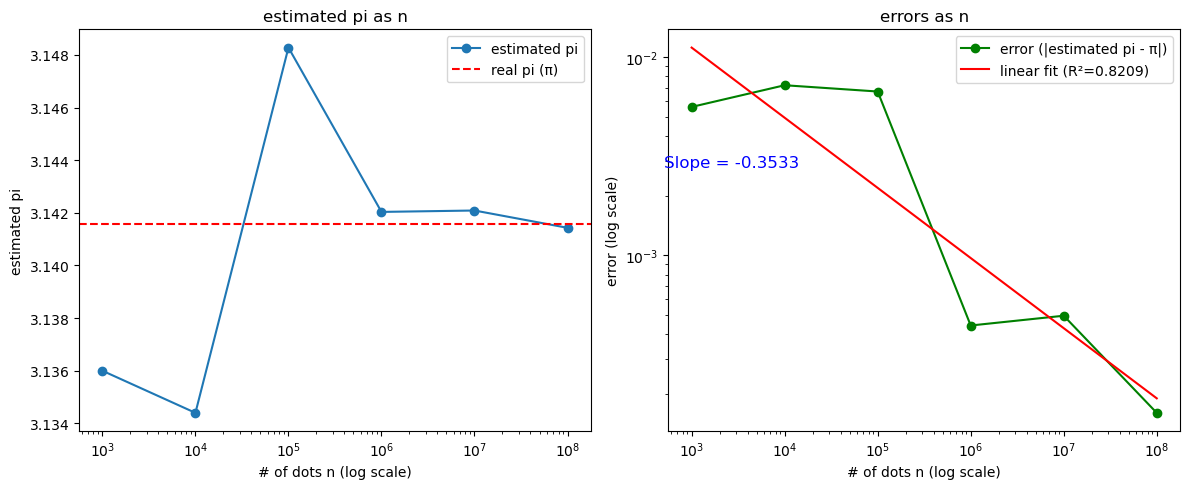

In [1]:
############################################################
#### 2024.09.30. ###########################################
#### EunChan Lee ###########################################
#### eunchan_supernova@gm.gist.ac.kr #######################
############################################################



import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def monte_carlo_pi(n):
    # [0,1] 구간에서 n개의 x, y 좌표를 랜덤 생성
    x = np.random.rand(n)
    y = np.random.rand(n)

    # 원점으로부터의 거리 계산
    distances = np.sqrt(x**2 + y**2)

    # 거리 <= 1인 점의 개수를 세기
    count = np.sum(distances <= 1)

    # P = count / n, 추정된 pi 값은 P * 4
    P = count / n
    pi_estimate = P * 4

    return pi_estimate

# 시뮬레이션 설정
n_values = [1000 * (10 ** i) for i in range(6)]  # 1000부터 10배씩 증가하는 n 값들
pi_actual = np.pi  # 실제 원주율

# 결과 저장 리스트
pi_estimates = []
errors = []

# 시뮬레이션 실행
for n in tqdm(n_values):
    pi_estimate = monte_carlo_pi(n)
    error = abs(pi_estimate - pi_actual)  # 실제 pi와 추정된 pi 사이의 오차

    pi_estimates.append(pi_estimate)
    errors.append(error)

# 결과 출력
for i, n in enumerate(n_values):
    print(f"n={n}, 추정된 원주율: {pi_estimates[i]}, 오차: {errors[i]}")

# 피팅 결과 시각화
plt.figure(figsize=(12, 5))

# 추정된 원주율 그래프
plt.subplot(1, 2, 1)
plt.plot(n_values, pi_estimates, marker='o', label="estimated pi")
plt.axhline(y=np.pi, color='r', linestyle='--', label="real pi (π)")
plt.xscale('log')  # 로그 스케일로 변경
plt.xlabel("# of dots n (log scale)")
plt.ylabel("estimated pi")
plt.title("estimated pi as n")
plt.legend()

# 추세선 생성
coeffs = np.polyfit(np.log10(n_values), np.log10(errors), 1) # 1차함수의 계수
trendline = np.polyval(coeffs, np.log10(n_values)) # 1차함수 만들기

# Residual 계산
residuals = np.log10(errors) - trendline
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.log10(errors) - np.mean(np.log10(errors)))**2)
r2 = 1 - (ss_res / ss_tot)


# 오차 그래프
plt.subplot(1, 2, 2)
plt.plot(n_values, errors, marker='o', color='g', label="error (|estimated pi - π|)")
plt.plot(n_values, 10**trendline, 'r-', label=f"linear fit (R²={r2:.4f})")
plt.xscale('log')  # 로그 스케일로 변경
plt.yscale('log')  # 로그 스케일로 변경
plt.xlabel("# of dots n (log scale)")
plt.ylabel("error (log scale)")
plt.title("errors as n")
plt.legend()

# 추세선의 기울기 표시
slope = coeffs[0]  # 추세선의 기울기
plt.text(
    x=0.5 * n_values[0],  # x 위치 (적당한 위치로 조정)
    y=0.5 * errors[0],    # y 위치 (적당한 위치로 조정)
    s=f"Slope = {slope:.4f}",  # 기울기 값 출력
    color="blue",
    fontsize=12
)

plt.tight_layout()
# 이미지 파일로 저장 (경로 지정 가능)
# plt.savefig(r"C:\Supernova\#4_GIST\SeJunior\2nd Semester\과학계산 프로그래밍\Hw_SC\HW_HM_errors_002.jpg", format='jpg', dpi=300)

plt.show()
